# INFO8010 Deep Learning - An introduction to PyTorch
*Joeri Hermans*<br>
*University of Liège, Belgium*<br>
[joeri.hermans@doct.uliege.be](mailto:joeri.hermans@doct.uliege.be)

In [1]:
!date

Thu Mar 14 13:13:04 CET 2019


## Front matter

The PyTorch documentation provides a great resource and is significantly more detailed than this lecture. Introductory concepts include:
- [Main concepts such as `tensors` and `autograd`](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html).
- A 60-minute [crash-course](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) covering the main usage.
- [Loading and processing data](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html).
- [Saving and loading models](https://pytorch.org/tutorials/beginner/saving_loading_models.html).
- [Syntactic sugar with torch.nn](https://pytorch.org/tutorials/beginner/nn_tutorial.html).
- [Transfer learning](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html).
- [Building a chatbot model](https://pytorch.org/tutorials/beginner/chatbot_tutorial.html).
- [Deploying a Seq2Seq model (chatbot) with the Hybrid frontend -> "compile" to graph](https://pytorch.org/tutorials/beginner/deploy_seq2seq_hybrid_frontend_tutorial.html).
- [Generative Adversarial Networks (DCGAN) using the faces dataset](https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html).
- [Reinforcement learning (DQN) tutorial](https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html).
- [Writing distributed applications](https://pytorch.org/tutorials/intermediate/dist_tuto.html).
- [Distributed training](https://pytorch.org/tutorials/beginner/aws_distributed_training_tutorial.html) (including multi-GPU).
- [ONNX](https://pytorch.org/tutorials/advanced/ONNXLive.html) (standard to describe models, useful to transfer between frameworks).
- [Using the C++ API](https://pytorch.org/tutorials/advanced/cpp_frontend.html).

And many more in PyTorch's [examples](https://github.com/pytorch/examples) GitHub repository. Check it out!

## Requirements

- [Anaconda](https://www.anaconda.com/distribution/) Python environment (optional, but recommended). Please do not use `Python 2.7`.
- [PyTorch](https://pytorch.org/get-started/locally/) according to your system configuration.

## Let's start

Have you ever used **numpy** before?

In [2]:
import numpy as np

> NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type.

In [3]:
# A 5x5 matrix of samples from Normal(mu=0, sigma=1).
m = np.random.randn(3, 3)

m

array([[ 0.44077922, -0.31248814,  0.72822945],
       [ 0.62378637,  0.34292561, -1.16910425],
       [-1.95882513,  1.19400686,  0.38254982]])

In fact, from an conceptual point-of-view, `pytorch` and `numpy` are quite similar.

In [4]:
import torch

> A `tensor` is an n-dimensional array.

In [5]:
# A 5x5 tensor of samples from Normal(mu=0, sigma=1).
#t = torch.randn(3, 3)
#t = torch.from_numpy(m)
#t = torch.from_numpy(m).float()
t = torch.tensor(m, dtype=torch.float32)

t

tensor([[ 0.4408, -0.3125,  0.7282],
        [ 0.6238,  0.3429, -1.1691],
        [-1.9588,  1.1940,  0.3825]])

Because of the similarities in the API, I personally use `pytorch` instead of `numpy` for computing projects because of the GPU acceleration. 

Consider the multiplication of the matrix `m`. In `numpy` this is:

In [6]:
np.matmul(m, m)

array([[-1.42711367,  0.62461249,  0.96490368],
       [ 2.77893518, -1.47324636, -0.39389681],
       [-0.86795242,  1.47833228, -2.67604828]])

In `pytorch`:

In [7]:
torch.matmul(t, t)

tensor([[-1.4271,  0.6246,  0.9649],
        [ 2.7789, -1.4732, -0.3939],
        [-0.8680,  1.4783, -2.6760]])

Alternatively, you can apply the operation on the `tensor` itself:

In [8]:
t.matmul(t)

tensor([[-1.4271,  0.6246,  0.9649],
        [ 2.7789, -1.4732, -0.3939],
        [-0.8680,  1.4783, -2.6760]])

## A simple neural network

In [9]:
# To draw a progress bar.
from tqdm import tqdm_notebook as tqdm
# Plotting functionality
import matplotlib.pyplot as plt

In [10]:
# Optimization hyperparameters.
batch_size = 32
learning_rate = 1e-6
training_iterations = range(10000)

# Configuration of the neural network.
num_hidden = 1000
num_in = 100
num_out = 1

### `numpy`

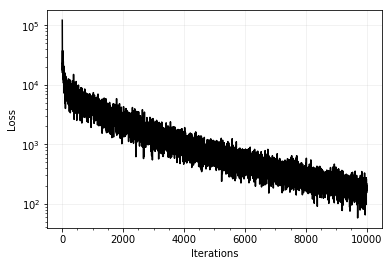

In [11]:
# Randomly initialize the weights.
w_1 = np.random.randn(num_in, num_hidden) # input -> hidden
w_2 = np.random.randn(num_hidden, num_out) # hidden -> output

losses = []
for iteration in tqdm(training_iterations):
    # Fetch the input and corresponding output.
    inputs = np.random.randn(batch_size, num_in)
    targets = np.random.randn(batch_size, num_out)
    
    # Apply the `forward` computation of the neural network (compute the prediction).
    h = np.matmul(inputs, w_1) # You could also do `inputs.dot(w_1)`.
    activation = np.maximum(h, 0)
    y_predicted = np.matmul(activation, w_2)
    
    # Compute loss.
    diff = y_predicted - targets
    loss = np.square(diff).mean()
    losses.append(loss)
    
    # Apply backpropagation.
    grad_y_prediction = diff
    grad_w_2 = np.matmul(activation.T, grad_y_prediction)
    grad_activation = np.matmul(grad_y_prediction, w_2.T)
    grad_h = grad_activation.copy()
    grad_h[h < 0] = 0 # Gradient of ReLU is h (except for activations < 0, then it is 0).
    grad_w_1 = np.matmul(inputs.T, grad_h)
    
    # Update the weights.
    w_1 -= learning_rate * grad_w_1
    w_2 -= learning_rate * grad_w_2
    
# Show the loss over the training iterations.
plt.plot(training_iterations, losses, color="black")
plt.minorticks_on()
plt.yscale("log")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True, alpha=.2)
plt.show()

Amazing, these things even fit random noise.

### `pytorch` (no autograd)

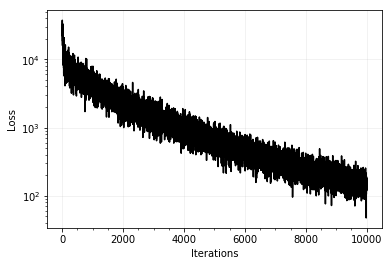

In [12]:
# Randomly initialize the weights.
w_1 = torch.randn(num_in, num_hidden) # input -> hidden
w_2 = torch.randn(num_hidden, num_out) # hidden -> output

losses = []
for iteration in tqdm(training_iterations):
    # Fetch the input and corresponding output.
    inputs = torch.randn(batch_size, num_in)
    targets = torch.randn(batch_size, num_out)
    
    # Apply the `forward` computation of the neural network (compute the prediction).
    h = torch.matmul(inputs, w_1)
    activation = torch.clamp(h, min=0)
    y_predicted = torch.matmul(activation, w_2)
    
    # Compute loss.
    diff = y_predicted - targets
    loss = torch.pow(diff, 2).mean()
    losses.append(loss)
    
    # Apply backpropagation.
    grad_y_prediction = diff
    grad_w_2 = torch.matmul(activation.t(), grad_y_prediction)
    grad_activation = torch.matmul(grad_y_prediction, w_2.t())
    grad_h = grad_activation.clone()
    grad_h[h < 0] = 0 # Gradient of ReLU is h (except for activations < 0, then it is 0).
    grad_w_1 = torch.matmul(inputs.t(), grad_h)
    
    # Update the weights.
    w_1 -= learning_rate * grad_w_1
    w_2 -= learning_rate * grad_w_2
    
# Show the loss over the training iterations.
plt.plot(training_iterations, losses, color="black")
plt.minorticks_on()
plt.yscale("log")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True, alpha=.2)
plt.show()